# Code First Girls Data Analysis Degree Project
## Review of Cryptocurrencies and NFTs

### Group 5 - Faitima Jeilani Ba-alawi, Helen Aughwan, Avu Harvey and Barbara Sheridan 


This project looks at how cryptocurrencies and NFTs have grown over time and how popular they have become.  We aim to determine how stable these are compared to other traditional markets and currencies. 

In [1]:
# Import required packages

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import mplfinance as mpl
import pandas_datareader as pdr
import seaborn as sns

from datetime import datetime
import requests #needed for NFTgo api

pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

### Question 1: How has the cryptocurrency market changed over time and how does this compare to the value of other currencies and traditional stocks?

# Data Gathering
Gather data for Bitcoin, XRP, Ethereum, Tether, GBP in USD and Dow Jones

In [2]:
#Create variables for yahoo finance API parameters. The period chosen corresponds with another CSV file with NFT values that we will be using for comparison.
start = '2018-06-01'
end = '2021-12-31'
interval = '1d'

In [3]:
#Gather adjusted close data for cryptocurrencies, GBP and Dow Jones Industrial.  Only the ‘Adjusted Close’ values were required for analysis. 

close_df= yf.download(['BTC-USD','ETH-USD', 'USDT-USD', 'XRP-USD', 'GBPUSD=X', 'DJI' ], start = start, end = end, interval = interval )['Adj Close']
close_df.head()

[*********************100%***********************]  6 of 6 completed


,BTC-USD,DJI,ETH-USD,GBPUSD=X,USDT-USD,XRP-USD
Date,,,,,,
2018-05-31,7494.170,24415.801,577.645,NaN,0.998,0.613
2018-06-01,7541.450,24635.199,580.043,1.329,1.001,0.623
2018-06-02,7643.450,NaN,591.808,NaN,0.994,0.643
2018-06-03,7720.250,NaN,618.329,NaN,1.000,0.671
2018-06-04,7514.470,24813.699,592.985,1.336,1.001,0.661


In [4]:
#Rename columns for easier reference going forward.
close_df = close_df.rename(columns = {'BTC-USD':'bitcoin', 'DJI': 'dow_jones', 'ETH-USD':'ethereum', 'GBPUSD=X': 'GBP', 'USDT-USD':'tether', 'XRP-USD': 'XRP'}, inplace = False)
close_df.head(20)

,bitcoin,dow_jones,ethereum,GBP,tether,XRP
Date,,,,,,
2018-05-31,7494.170,24415.801,577.645,NaN,0.998,0.613
2018-06-01,7541.450,24635.199,580.043,1.329,1.001,0.623
2018-06-02,7643.450,NaN,591.808,NaN,0.994,0.643
2018-06-03,7720.250,NaN,618.329,NaN,1.000,0.671
2018-06-04,7514.470,24813.699,592.985,1.336,1.001,0.661
2018-06-05,7633.760,24800.000,609.303,1.332,1.001,0.677
2018-06-06,7653.980,25146.400,607.124,1.341,1.001,0.675
2018-06-07,7678.240,25241.400,605.187,1.342,0.999,0.678
2018-06-08,7624.920,25316.500,601.077,1.342,1.002,0.674


Dow Jones and GBP seem to have missing values, possibly at weekends as commonly every 6th and 7th value, plus some others missing for Dow Jones. 

In [5]:
#getting an idea of the distriubution of the values
close_df.describe()

,bitcoin,dow_jones,ethereum,GBP,tether,XRP
count,1311.000,732.000,1311.000,935.000,1311.000,1311.000
mean,19374.224,28647.888,957.536,1.310,1.002,0.471
std,18472.435,4180.998,1258.499,0.052,0.006,0.322
min,3236.762,18591.900,84.308,1.149,0.967,0.140
25%,6793.227,25413.450,180.921,1.275,1.000,0.256
50%,9552.860,27160.850,269.432,1.306,1.001,0.325
75%,33772.008,32885.101,1503.901,1.347,1.003,0.550
max,67566.828,36488.602,4812.087,1.423,1.054,1.839


In [6]:
close_df.shape

(1311, 6)

# Checking data and cleaning

Checking data types and null values to see if any data may need further investigation or manipulation.

In [7]:
close_df.dtypes

bitcoin      float64
dow_jones    float64
ethereum     float64
GBP          float64
tether       float64
XRP          float64
dtype: object

In [8]:
#get a better understanding of numbers of NaN.
close_df.isna().sum()

bitcoin        0
dow_jones    579
ethereum       0
GBP          376
tether         0
XRP            0
dtype: int64

<AxesSubplot:xlabel='Date'>

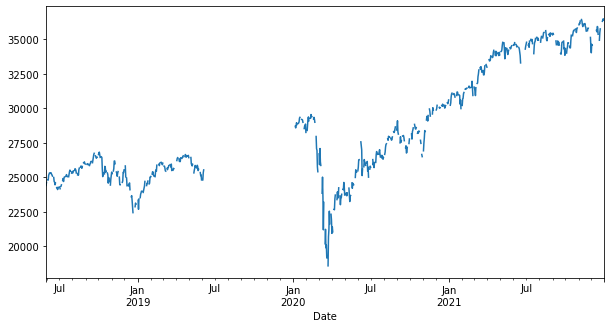

In [9]:
close_df['dow_jones'].plot(figsize=(10,5))

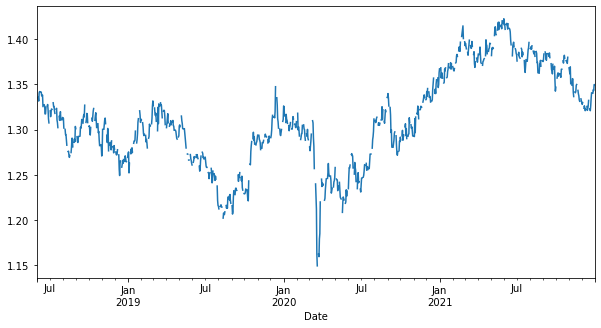

In [10]:
plot_2 = close_df['GBP'].plot(figsize=(10,5))

We have missing values for GBP and Dow Jones. A simple plot was done to view these NaN values to get an indication of what the NaN values might be. We could see from printing the head and tail of the data frame that GBP NaN values occurred every 6 and 7th value so it is likely weekend values are not recorded however the Dow Jones has multiple missing values including a gap between June 2019 and Dec 2019.

As we are doing time series comparisons it does not make sense to drop these values. Also, we cannot change them to 0 as this will affect the analysis. It was decided to fill the values with those between the corresponding values so we have an average value for the period.


In [11]:
close_df = close_df.interpolate()
close_df.isna().sum()

bitcoin      0
dow_jones    0
ethereum     0
GBP          1
tether       0
XRP          0
dtype: int64

In [12]:
#one left which is the first value so putting in a backfill.

close_df.fillna(method = 'bfill', inplace = True)
close_df.isna().sum()

bitcoin      0
dow_jones    0
ethereum     0
GBP          0
tether       0
XRP          0
dtype: int64

# Analysis


### How has cryptocurrency evolved?
Compare cryptocurrency values and compare growth using percentage change.

In [13]:
close_df.std()

bitcoin     18472.435
dow_jones    3897.078
ethereum     1258.499
GBP             0.052
tether          0.006
XRP             0.322
dtype: float64

Standard deviation measures volitiliy of a stock.  Bitcoin has the hihghest standard deviation, followed by the Dow Jones and then Ethereum.

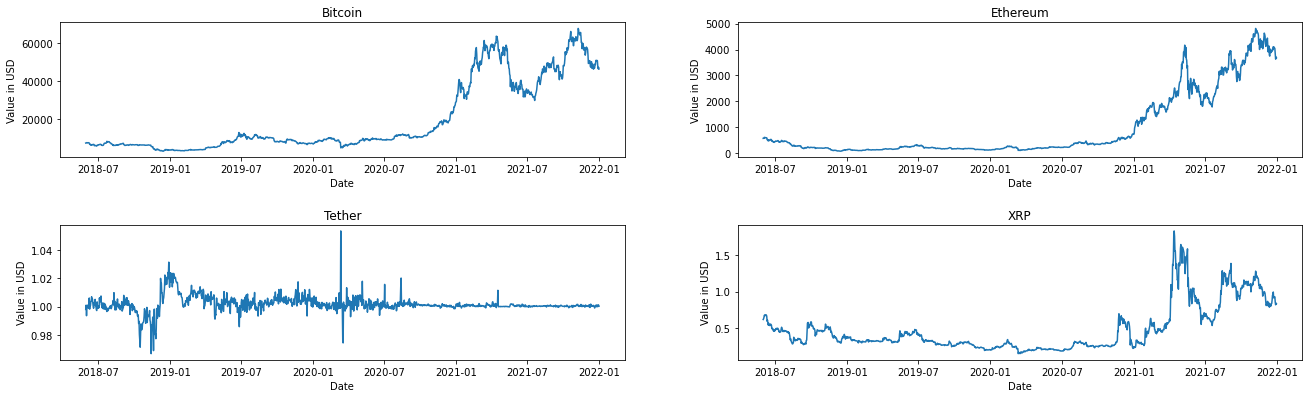

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)


ax1.plot(close_df['bitcoin'])
ax1.set_title("Bitcoin")
ax1.set_ylabel ('Value in USD')
ax1.set_xlabel ('Date')
ax2.plot(close_df['ethereum'])
ax2.set_title("Ethereum")
ax2.set_ylabel ('Value in USD')
ax2.set_xlabel ('Date')
ax3.plot(close_df['tether'])
ax3.set_title("Tether")
ax3.set_ylabel ('Value in USD')
ax3.set_xlabel ('Date')               
ax4.plot(close_df['XRP'])
ax4.set_title("XRP")
ax4.set_ylabel ('Value in USD')
ax4.set_xlabel ('Date')
plt.subplots_adjust(left = None, right = 3.0, top = 2.0, hspace = 0.5)
plt.show()

Bitcoin and Ethereum and XRP have had grown in a similar way particularly since January 2021 however bitcoins values is significantly higher.  XRP and Tether values are low in comparison and although XRP is starting to show similar growth like Bitcoin and Ethereum, Tethers values seems to be quite volatile up to approx Oct 2020 where it has remained quite level.

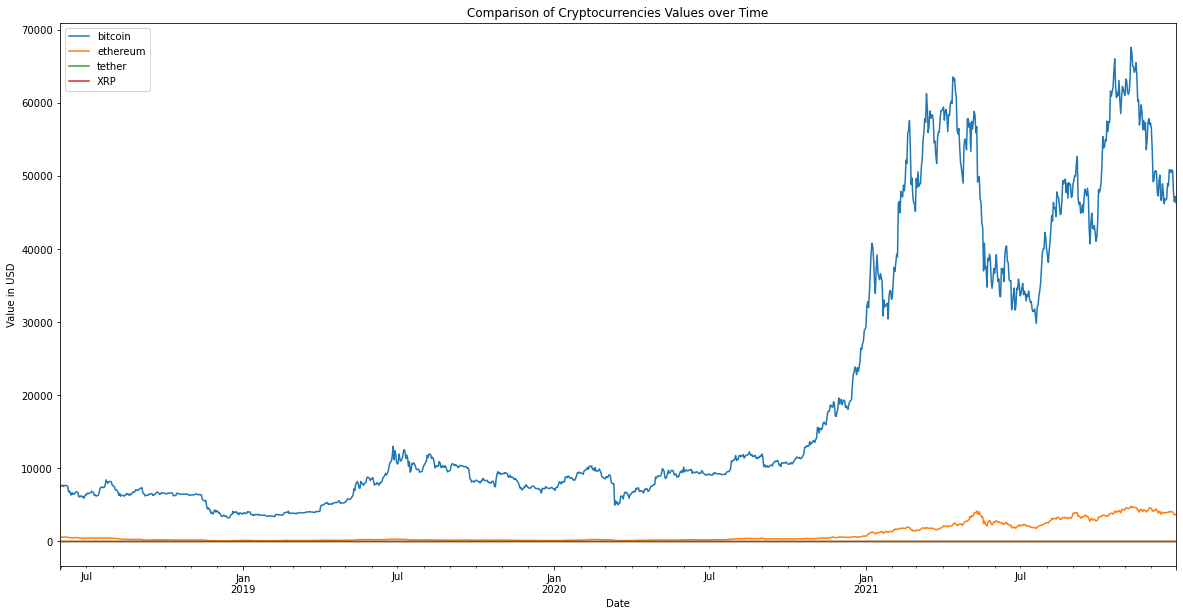

In [15]:
close_df[['bitcoin', 'ethereum', 'tether', 'XRP']].plot(figsize = (20,10))  

plt.title('Comparison of Cryptocurrencies Values over Time')
  
# # adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

## How does cryptocurrencies compare to other currencies and markets?

As Ethereum and Bitcoin are the largest, we used these to do similar comparison to GBP and Dow Jones.


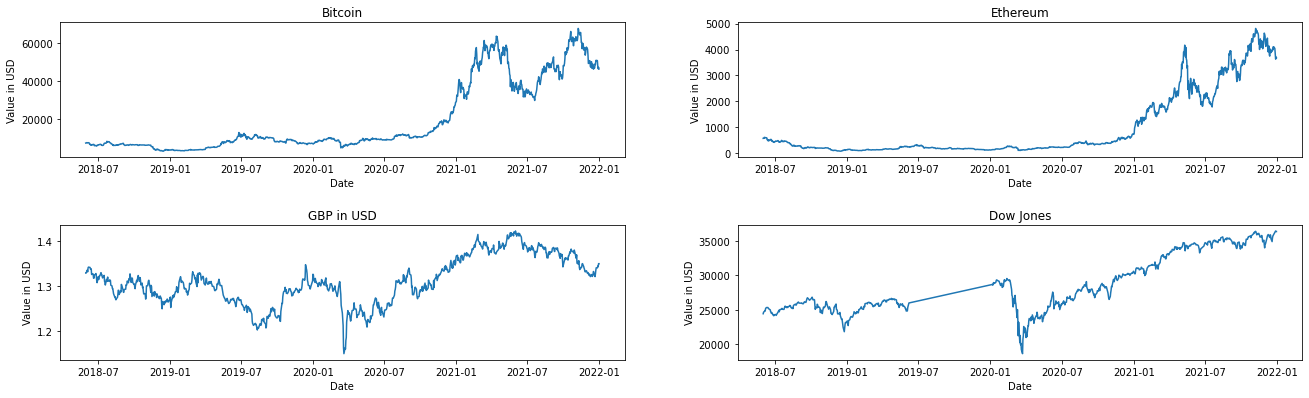

In [16]:
# create individual subplots first to see each value
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)


ax1.plot(close_df['bitcoin'])
ax1.set_title("Bitcoin")
ax1.set_ylabel ('Value in USD')
ax1.set_xlabel ('Date')
ax2.plot(close_df['ethereum'])
ax2.set_title("Ethereum")
ax2.set_ylabel ('Value in USD')
ax2.set_xlabel ('Date')
ax3.plot(close_df['GBP'])
ax3.set_title("GBP in USD")
ax3.set_ylabel ('Value in USD')
ax3.set_xlabel ('Date')               
ax4.plot(close_df['dow_jones'])
ax4.set_title("Dow Jones")
ax4.set_ylabel ('Value in USD')
ax4.set_xlabel ('Date')
plt.subplots_adjust(left = None, right = 3.0, top = 2.0, hspace = 0.5)
plt.show()

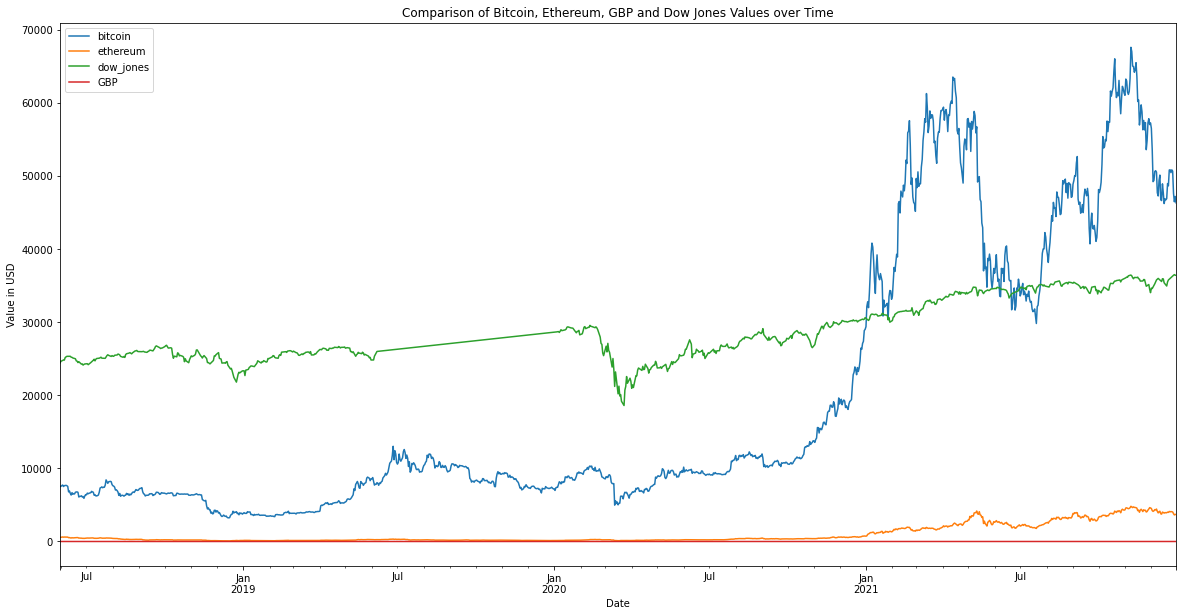

In [17]:
#plot together to allow better comparison

close_df[['bitcoin', 'ethereum', 'dow_jones', 'GBP']].plot(figsize = (20,10))  

plt.title('Comparison of Bitcoin, Ethereum, GBP and Dow Jones Values over Time')
  
# # adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

Text(0.5, 1.0, 'Correlation between stocks and currencies')

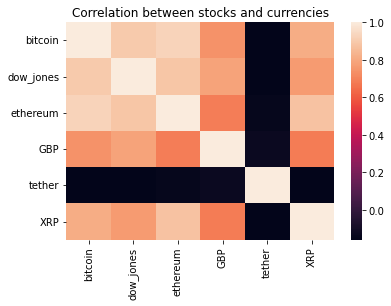

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(close_df.corr(),annot=False) 
plt.title('Correlation between stocks and currencies') 

# Percentage Change
Percentage change is commonly used to compare stock movement.  It allows better comaprison as it removes the inital value of the stock as a factor.

In [19]:
## calculate percetange change for all values
per_change= close_df.pct_change()
per_change.head()


,bitcoin,dow_jones,ethereum,GBP,tether,XRP
Date,,,,,,
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,0.006,0.009,0.004,0.000,0.003,0.018
2018-06-02,0.014,0.002,0.020,0.002,-0.007,0.032
2018-06-03,0.010,0.002,0.045,0.002,0.007,0.043
2018-06-04,-0.027,0.002,-0.041,0.002,0.000,-0.015


Compare percentage change in the histogram to see the distribution.

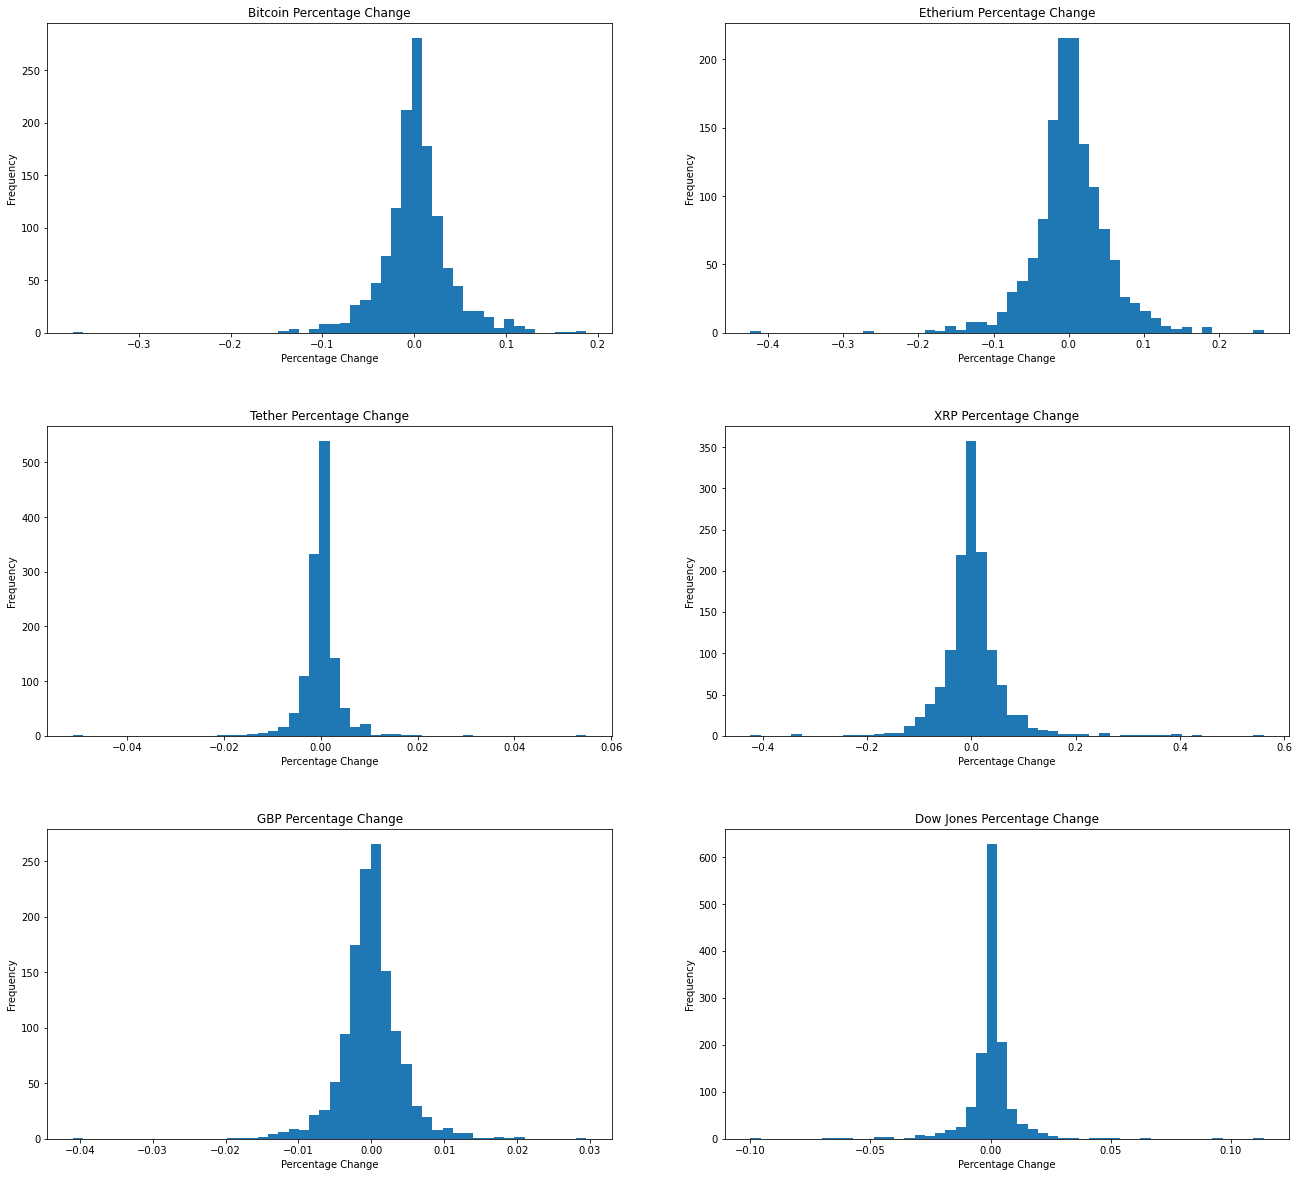

In [20]:

n = 50
fig = plt.figure()


ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.hist(per_change['bitcoin'], bins = n)
ax1.set_title("Bitcoin Percentage Change")
ax1.set_ylabel ('Frequency')
ax1.set_xlabel ('Percentage Change')
ax2.hist(per_change['ethereum'], bins = n)
ax2.set_title("Etherium Percentage Change")
ax2.set_ylabel ('Frequency')
ax2.set_xlabel ('Percentage Change')
ax3.hist(per_change['tether'], bins = n)
ax3.set_title("Tether Percentage Change")
ax3.set_ylabel ('Frequency')
ax3.set_xlabel ('Percentage Change')
ax4.hist(per_change['XRP'], bins = n)
ax4.set_title("XRP Percentage Change")
ax4.set_ylabel ('Frequency')
ax4.set_xlabel ('Percentage Change')
ax5.hist(per_change['GBP'], bins = n)
ax5.set_title("GBP Percentage Change")
ax5.set_ylabel ('Frequency')
ax5.set_xlabel ('Percentage Change')
ax6.hist(per_change['dow_jones'], bins = n)
ax6.set_title("Dow Jones Percentage Change")
ax6.set_ylabel ('Frequency')
ax6.set_xlabel ('Percentage Change')

plt.subplots_adjust(left = None, right = 3.0, top = 4.0, hspace = 0.3)
plt.show()

### Further exploratory analysis

In [21]:
per_change.describe()

,bitcoin,dow_jones,ethereum,GBP,tether,XRP
count,1310.000,1310.000,1310.000,1310.000,1310.000,1310.000
mean,0.002,0.000,0.003,0.000,0.000,0.002
std,0.038,0.010,0.050,0.004,0.004,0.061
min,-0.372,-0.100,-0.423,-0.041,-0.051,-0.423
25%,-0.014,-0.002,-0.020,-0.002,-0.001,-0.021
50%,0.001,0.000,0.001,-0.000,-0.000,-0.001
75%,0.018,0.003,0.028,0.002,0.001,0.021
max,0.187,0.114,0.259,0.029,0.055,0.560


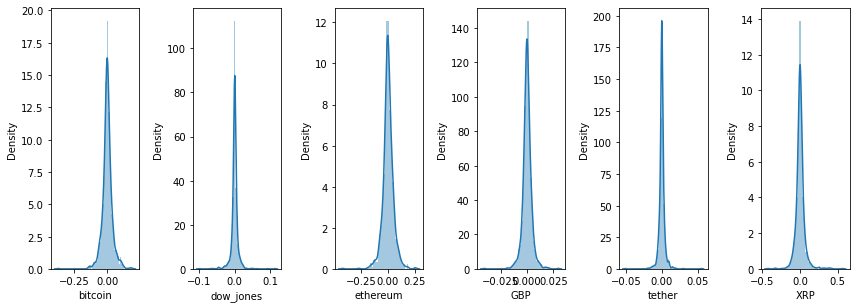

In [22]:
# Checking for skewed values

l = per_change.columns.values
number_of_columns=6
number_of_rows = int(len(l)-1/number_of_columns)

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(per_change[l[i]],kde=True) 
    plt.tight_layout()

<AxesSubplot:>

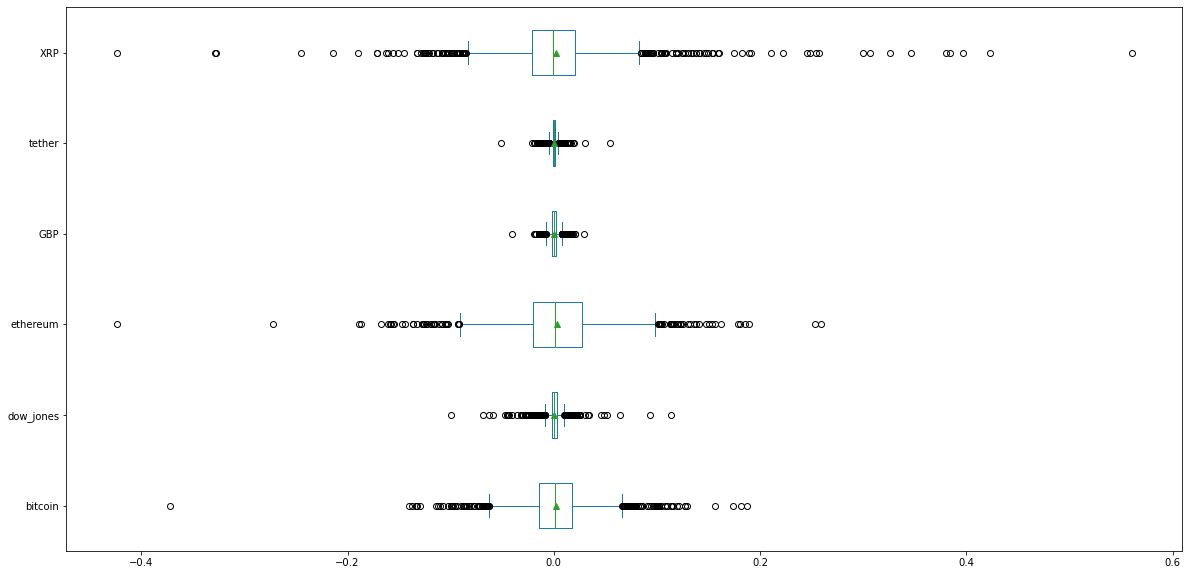

In [23]:
#Identify outliers using boxplot
                  
per_change.plot(kind = 'box',vert = False, showmeans = True, figsize = (20,10))                


In [24]:
# variance to identify how risky an investment is.  The higher the variance, the riskier the investment.
per_change.var()

bitcoin     0.001
dow_jones   0.000
ethereum    0.002
GBP         0.000
tether      0.000
XRP         0.004
dtype: float64

Text(0.5, 1.0, 'Correlation between % Change')

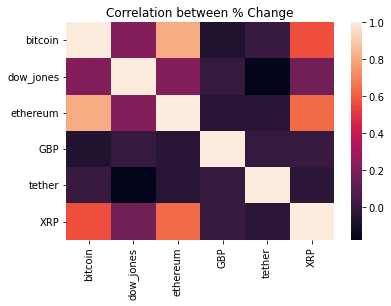

In [25]:
# heatmap to identify any corelation
plt.figure(figsize=(6,4))
sns.heatmap(per_change.corr(),annot=False) 
plt.title('Correlation between % Change')

In [26]:
per_change.corr()

,bitcoin,dow_jones,ethereum,GBP,tether,XRP
bitcoin,1.000,0.215,0.805,-0.072,-0.001,0.567
dow_jones,0.215,1.000,0.217,-0.010,-0.177,0.166
ethereum,0.805,0.217,1.000,-0.048,-0.049,0.637
GBP,-0.072,-0.010,-0.048,1.000,-0.009,-0.001
tether,-0.001,-0.177,-0.049,-0.009,1.000,-0.036
XRP,0.567,0.166,0.637,-0.001,-0.036,1.000


# Correlation between Ethereum Values and Sales of NFT

During the analysis it was noted that the values of Etherem and NFT sales rose in 2021.  Further analysis was done to see if there was any correlation

This dataset has information pulled on January 16, 2022, and represents all time information for the top NFT collections. 

Data cleansing & transformation

In [27]:
# CSV 1

nfth = pd.read_csv("NFT_Sales_history.csv")

nfth

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.000,0,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.300,19,8.000,0,19.000,53.700,1020.300,19.000,8.000,0.000
2,2017-06-24,2261.140,40,21.000,0,21.000,56.530,1240.840,21.000,13.000,0.000
3,2017-06-25,2778.690,53,28.000,0,13.000,52.430,517.550,13.000,7.000,0.000
4,2017-06-26,3203.320,67,34.000,0,14.000,47.810,424.630,14.000,6.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1601,2021-11-08,10088033031.850,10913146,NaN,6541355,14829.000,924.390,77066977.220,59264.000,NaN,44435.000
1602,2021-11-09,10140008108.450,10964025,NaN,6573511,18723.000,924.840,51975076.600,50879.000,NaN,32156.000
1603,2021-11-10,10199018447.070,11008847,NaN,6601205,17128.000,926.440,59010338.620,44822.000,NaN,27694.000
1604,2021-11-11,10234561613.170,11022782,NaN,6609013,6127.000,928.490,35543166.100,13935.000,NaN,7808.000


In [28]:
nfth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1606 non-null   object 
 1   Sales_USD_cumsum              1606 non-null   float64
 2   Number_of_Sales_cumsum        1606 non-null   int64  
 3   Active_Market_Wallets_cumsum  1598 non-null   float64
 4   Primary_Sales_cumsum          1606 non-null   int64  
 5   Secondary_Sales_cumsum        1605 non-null   float64
 6   AverageUSD_cum                1605 non-null   float64
 7   Sales_USD                     1605 non-null   float64
 8   Number_of_Sales               1605 non-null   float64
 9   Active_Market_Wallets         1597 non-null   float64
 10  Primary_Sales                 1605 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 138.1+ KB


In [29]:
# checking for null values

nfth.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    8
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          1
AverageUSD_cum                  1
Sales_USD                       1
Number_of_Sales                 1
Active_Market_Wallets           9
Primary_Sales                   1
dtype: int64

In [30]:
# Remove null values

nfth['Active_Market_Wallets_cumsum'] = nfth['Active_Market_Wallets_cumsum'].fillna(nfth['Active_Market_Wallets_cumsum'].mean())
nfth['Active_Market_Wallets'] = nfth['Active_Market_Wallets'].fillna(nfth['Active_Market_Wallets'].mean())
nfth = nfth.fillna(0)

In [31]:
nfth.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    0
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          0
AverageUSD_cum                  0
Sales_USD                       0
Number_of_Sales                 0
Active_Market_Wallets           0
Primary_Sales                   0
dtype: int64

In [32]:
# delete columns

nfth.drop(nfth[['AverageUSD_cum','Active_Market_Wallets','Secondary_Sales_cumsum','Active_Market_Wallets_cumsum','Primary_Sales_cumsum','Primary_Sales']], axis = 1, inplace = True)

In [33]:
# convert

nfth['Date'] = pd.to_datetime(nfth['Date'], format = '%Y-%m-%d')
nfth['Sales_USD_cumsum'] = nfth['Sales_USD_cumsum'].astype('int64')
nfth['Sales_USD'] = nfth['Sales_USD'].astype('int64')
nfth['Number_of_Sales'] = nfth['Number_of_Sales'].astype('int64')

nfth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1606 non-null   datetime64[ns]
 1   Sales_USD_cumsum        1606 non-null   int64         
 2   Number_of_Sales_cumsum  1606 non-null   int64         
 3   Sales_USD               1606 non-null   int64         
 4   Number_of_Sales         1606 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 62.9 KB


In [34]:
nfth.set_index('Date', inplace = True)
nfth.describe()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Sales_USD,Number_of_Sales
count,1606.000,1606.000,1606.000,1606.000
mean,591490485.386,3397817.918,6368844.395,6862.134
std,1720004922.074,2329504.159,24853786.974,12607.583
min,0.000,0.000,-6196719.000,-2195.000
25%,51296686.750,1451181.000,46034.750,2272.500
50%,86914802.000,3203392.000,82027.000,3678.000
75%,132858626.750,4938127.750,352565.000,5840.750
max,10234561613.000,11022782.000,388636358.000,161732.000


In [35]:
#Creating a new CSV file   ### Uncomment if you wish to create the file.

#nfth.to_csv(r'C:\Users\blshe\Desktop\proj\nft1_sales_history.csv')

In [36]:
df = pd.read_csv(r"nft1_sales_history.csv")
df

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Sales_USD,Number_of_Sales
0,2017-06-22,0,0,0,0
1,2017-06-23,1020,19,1020,19
2,2017-06-24,2261,40,1240,21
3,2017-06-25,2778,53,517,13
4,2017-06-26,3203,67,424,14
...,...,...,...,...,...
1601,2021-11-08,10088033031,10913146,77066977,59264
1602,2021-11-09,10140008108,10964025,51975076,50879
1603,2021-11-10,10199018447,11008847,59010338,44822
1604,2021-11-11,10234561613,11022782,35543166,13935


In [37]:
df.dtypes

Date                      object
Sales_USD_cumsum           int64
Number_of_Sales_cumsum     int64
Sales_USD                  int64
Number_of_Sales            int64
dtype: object

In [38]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.dtypes

Date                      datetime64[ns]
Sales_USD_cumsum                   int64
Number_of_Sales_cumsum             int64
Sales_USD                          int64
Number_of_Sales                    int64
dtype: object

In [39]:
df.set_index('Date', inplace = True)
df.head()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Sales_USD,Number_of_Sales
Date,,,,
2017-06-22,0,0,0,0
2017-06-23,1020,19,1020,19
2017-06-24,2261,40,1240,21
2017-06-25,2778,53,517,13
2017-06-26,3203,67,424,14


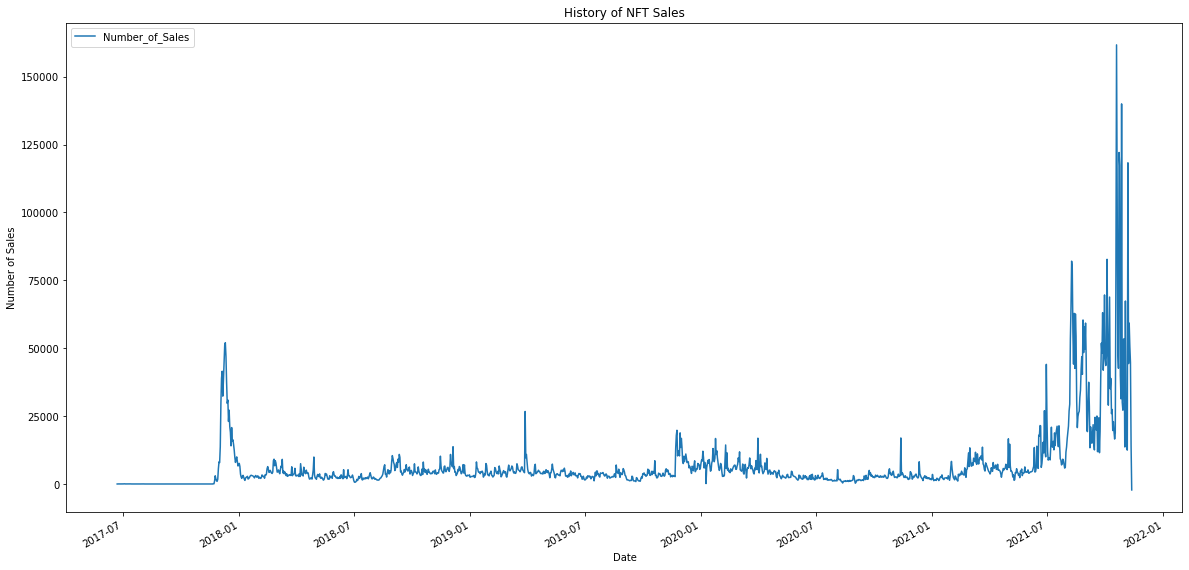

In [40]:
df[['Number_of_Sales']].plot(figsize = (20,10)) 

#df.plot(x= 'Date', y = 'Number_of_Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('History of NFT Sales')

plt.show()

In [41]:
#pull out relevent coloums from datasets for joining
df1 = pd.DataFrame(close_df['ethereum'])
df1.head()

df2 =  pd.DataFrame(df['Sales_USD'])
df2.head()
    

,Sales_USD
Date,
2017-06-22,0
2017-06-23,1020
2017-06-24,1240
2017-06-25,517
2017-06-26,424


In [42]:
#Join datasets together for correlation analysis and rename column headers
eth_nft = df1.join(df2)
eth_nft.rename(columns = {'ethereum':'Ethereum Values USD'  , 'Sales_USD': 'NFT Sales USD'}, inplace = True)
eth_nft.head()


,Ethereum Values USD,NFT Sales USD
Date,,
2018-05-31,577.645,43862.000
2018-06-01,580.043,34377.000
2018-06-02,591.808,47959.000
2018-06-03,618.329,58762.000
2018-06-04,592.985,47920.000


In [43]:
#Check data is clean
eth_nft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1312 entries, 2018-05-31 to 2021-12-31
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ethereum Values USD  1312 non-null   float64
 1   NFT Sales USD        1263 non-null   float64
dtypes: float64(2)
memory usage: 30.8 KB


In [44]:
eth_nft.corr()

,Ethereum Values USD,NFT Sales USD
Ethereum Values USD,1.000,0.636
NFT Sales USD,0.636,1.000


Text(0.5, 1.0, 'Correlation of Eth and NFT Sales Values')

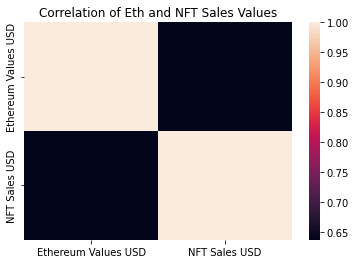

In [45]:
# Check correlation between NFT sales and Etheeu values.
sns.heatmap(eth_nft.corr(),annot=False) 
plt.title('Correlation of Eth and NFT Sales Values')

There is a positive correaltion of 0.64 between the values of Ethereum and the sales of NFTs

# Question 2: What are the best markets to buy NFTs? 

Text(0.5, 1.0, 'NFT buying and exchanging platforms: activity over the last twelve months\n')

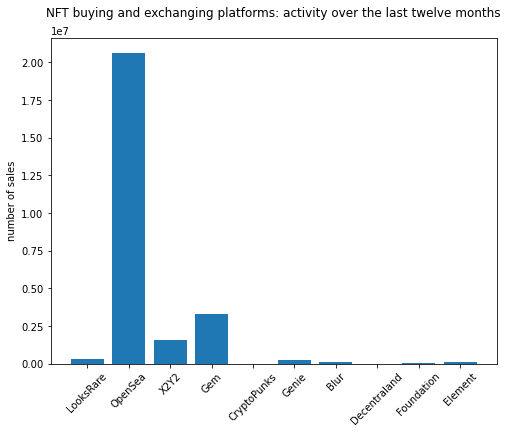

In [46]:
#code to call the API and get the latest market information and filter it into a dataframe

api_key='4371cfd1-7538-4e2c-a1f1-bbc8caa09187'

url = "https://data-api.nftgo.io/eth/v1/market/rank/marketplaces/1y"
headers = {
    "accept": "application/json",
    "X-API-KEY": api_key
}
response = requests.get(url, headers=headers)
response
marketplace_leaderboard=response.json()
leaderboard={}
def make_row():
    n=0
    for i in marketplace_leaderboard['marketplaces_info']:
        leaderboard.update ({
            marketplace_leaderboard['marketplaces_info'][n]['marketplace_name']:
            [marketplace_leaderboard['marketplaces_info'][n]['volume_usd'],
            marketplace_leaderboard['marketplaces_info'][n]['sale_num'],
            marketplace_leaderboard['marketplaces_info'][n]['trader_num'],
            marketplace_leaderboard['marketplaces_info'][n]['buyer_num'],
            marketplace_leaderboard['marketplaces_info'][n]['seller_num']]
        })
        n+=1
    return leaderboard

make_row()  

rowheader=leaderboard.keys()
columndata=leaderboard.values()
df=pd.DataFrame(data=columndata, index=rowheader, columns=('volume_in_US_dollars','number_of_sales','number_of_users_trading','number_of_users_buying','number_of_users_selling'))

#visualise top performing marketplaces
plt.figure(figsize=(8,6))
plt.bar(df.index,height=df['number_of_sales'])
plt.xticks(rotation=45)


plt.ylabel('number of sales')
plt.title("NFT buying and exchanging platforms: activity over the last twelve months\n" )

Text(0.5, 1.0, 'NFT buying and exchanging platforms: activity all time\n')

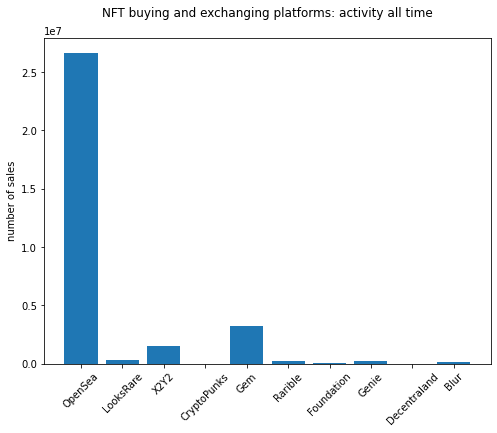

In [47]:
url = "https://data-api.nftgo.io/eth/v1/market/rank/marketplaces/all"
headers = {
    "accept": "application/json",
    "X-API-KEY": api_key
}
response = requests.get(url, headers=headers)
response
marketplace_leaderboard=response.json()
leaderboard={}
make_row()  

rowheader=leaderboard.keys()
columndata=leaderboard.values()
df=pd.DataFrame(data=columndata, index=rowheader, columns=('volume_in_US_dollars','number_of_sales','number_of_users_trading','number_of_users_buying','number_of_users_selling'))

#visualise top performing marketplaces
plt.figure(figsize=(8,6))
plt.bar(df.index,height=df['number_of_sales'])
plt.xticks(rotation=45)


plt.ylabel('number of sales')
plt.title("NFT buying and exchanging platforms: activity all time\n" )

Text(0.5, 1.0, 'NFT buying and exchanging platforms: activity over the tweleve months\n')

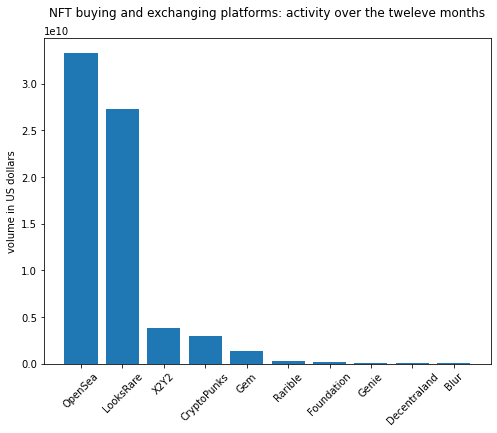

In [48]:
#visualise top performing marketplaces
plt.figure(figsize=(8,6))
plt.bar(df.index,height=df['volume_in_US_dollars'])
plt.xticks(rotation=45)


plt.ylabel('volume in US dollars')
plt.title("NFT buying and exchanging platforms: activity over the tweleve months\n" )

The plots above show the activity of marketplaces that sell NFTS. The first plot shows that X2Y2 and Gem have performed better in the last year compared with historical data that shows Opensea has sold the most NFTs (second plot). The final plot shows that LooksRare has been a higher volume in US dollars than Opensea, but less sales (plot 1), showing that it has been selling higher value NFTs in less numbers than OpenSea.

# Question 3: Which NFT collections are the best to invest in?

## NFT sales

This is a dataset that consists of 250 collections and their all time statistics such as sales, transactions, ownership and buyers.

In [49]:
nftc = pd.read_csv("nft_sales.csv")

nftc

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,090,222,023","1,790,587","17,670,824","2,130,467"
1,Bored Ape Yacht Club,"$2,439,754,017","12,052","32,670","6,586"
2,CryptoPunks,"$2,388,467,992","6,076","22,269","3,804"
3,Mutant Ape Yacht Club,"$1,744,822,678","23,768","51,775","13,121"
4,Art Blocks,"$1,310,734,558","33,549","184,470","36,091"
...,...,...,...,...,...
245,Mindblowon,"$21,255,015","11,313","16,333","3,973"
246,Sipherian Surge,"$21,053,426","6,210","15,023","3,636"
247,Gutter Rats,"$20,915,001","2,931","5,209",NaN
248,Wool Pouch,"$20,911,179","2,249","6,139","3,270"


In [50]:
# checking for null values

nftc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       231 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [51]:
# rename/replace

nftc.rename(columns = {'Txns':'Transactions'}, inplace = True)
nftc['Sales'] = nftc['Sales'].str.replace(',', '')
nftc['Sales'] = nftc['Sales'].str.replace('$', '')
nftc['Buyers'] = nftc['Buyers'].str.replace(',','')
nftc['Transactions'] = nftc['Transactions'].str.replace(',','')
nftc['Owners'] = nftc['Owners'].str.replace(',','')
nftc=nftc.dropna()

In [52]:
# Converting to integar

nftc['Sales'] = nftc['Sales'].astype('int64')
nftc['Buyers'] = nftc['Buyers'].astype('int64')
nftc['Transactions'] = nftc['Transactions'].astype('int64')
nftc['Owners'] = nftc['Owners'].astype('int32')

In [53]:
# creating a column that indicates if a collection made $100 million+ to categorize NFT collections

nftc['100 mil club'] = np.where(nftc['Sales']>=100000000, 'Yes', 'No')

In [54]:
nftc.head()

,Collections,Sales,Buyers,Transactions,Owners,100 mil club
0,Axie Infinity,4090222023,1790587,17670824,2130467,Yes
1,Bored Ape Yacht Club,2439754017,12052,32670,6586,Yes
2,CryptoPunks,2388467992,6076,22269,3804,Yes
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121,Yes
4,Art Blocks,1310734558,33549,184470,36091,Yes


## Collections that made more than 100 million:

Text(0, 0.5, 'NFT Collections')

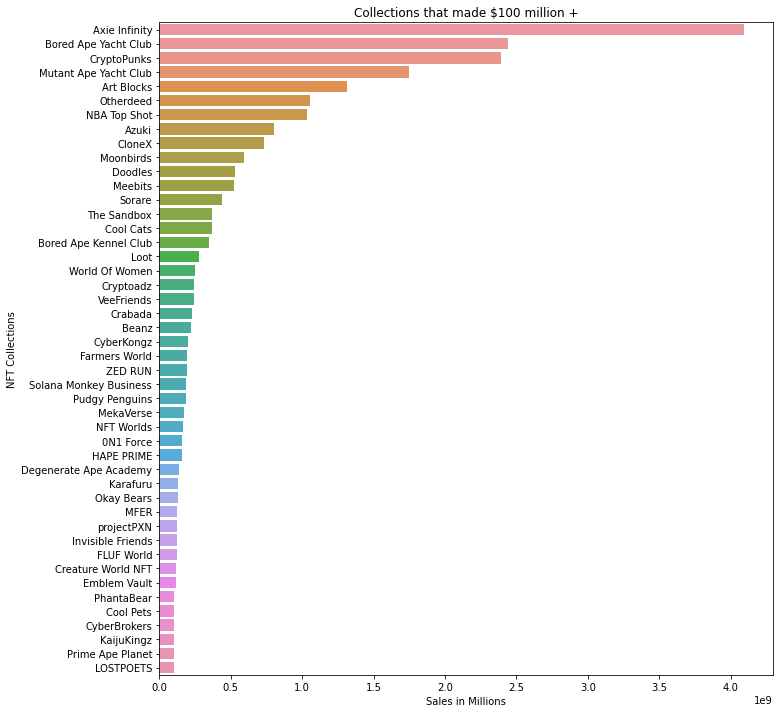

In [55]:
mil_collections = nftc[ nftc['100 mil club'] == 'Yes' ]
plt.figure(figsize=(11,12))
graph = sns.barplot(y= "Collections", x = "Sales", data = mil_collections)
plt.title('Collections that made $100 million +')
plt.xlabel('Sales in Millions')
plt.ylabel('NFT Collections')

Most NFT collections in this dataset have made over $100 million in sales, this is a good indication that NFTs could be a worthwhile investment as they do make profits and returns in investments in the same way that other traditional investments do.

### Analysis

#### Sales from the top 3 collections 

In [56]:
# Sales from 'Axie Infinity' collection

axie_collection = nftc[nftc['Collections'].str.contains("Axie")]

sum_sales = axie_collection['Sales'].sum()

print(f"The total sales from the 'Axie Infinity' Collection are ${sum_sales:,}")
axie_collection

The total sales from the 'Axie Infinity' Collection are $4,090,222,023


,Collections,Sales,Buyers,Transactions,Owners,100 mil club
0,Axie Infinity,4090222023,1790587,17670824,2130467,Yes


In [57]:
# Sales from the 'Bored Ape' collection

bored_collection = nftc[nftc['Collections'].str.contains("Bored Ape Yacht")]

sum_sales = bored_collection['Sales'].sum()

print(f"The total sales from the 'Bored Ape Yacht' Collection are ${sum_sales:,}")
bored_collection

The total sales from the 'Bored Ape Yacht' Collection are $2,439,754,017


,Collections,Sales,Buyers,Transactions,Owners,100 mil club
1,Bored Ape Yacht Club,2439754017,12052,32670,6586,Yes


In [58]:
# crypto punks

crypto_punks_collection = nftc[nftc['Collections'].str.contains("CryptoPunks")]

sum_sales = crypto_punks_collection['Sales'].sum()

print(f"The total sales from the 'CryptoPunks' Collection are ${sum_sales:,}")
crypto_punks_collection

The total sales from the 'CryptoPunks' Collection are $2,388,467,992


,Collections,Sales,Buyers,Transactions,Owners,100 mil club
2,CryptoPunks,2388467992,6076,22269,3804,Yes


In [59]:
top3 = pd.concat([axie_collection, bored_collection, crypto_punks_collection, ], axis=0)
top3

,Collections,Sales,Buyers,Transactions,Owners,100 mil club
0,Axie Infinity,4090222023,1790587,17670824,2130467,Yes
1,Bored Ape Yacht Club,2439754017,12052,32670,6586,Yes
2,CryptoPunks,2388467992,6076,22269,3804,Yes


Text(0, 0.5, 'NFT Collections')

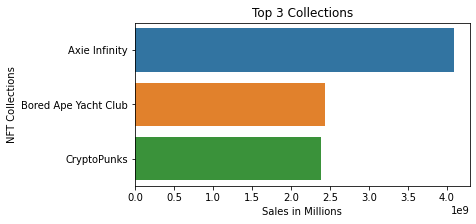

In [60]:
# top 3 collection sales compared to others in a graph

plt.figure(figsize=(6,3))
sns.barplot(y= "Collections", x = "Sales", data = top3)
plt.title('Top 3 Collections')
plt.xlabel('Sales in Millions')
plt.ylabel('NFT Collections')

All 3 of the above collections have made over $2 billion in sales, in comparison to the rest of the NFT collections these are making the most in sales indicating that they would be the best collections to invest in as you are more likely to make a larger return on your investment.

### Collection that made the most sales of all time?

In [61]:
maximum_sale = nftc['Sales'].max()
collection = nftc[nftc['Sales'] == maximum_sale ]['Collections'][0]

print(f'The NFT Collection having maxiumum sales is {collection}')
print(f'Total sales of {collection} is ${maximum_sale:,}')

The NFT Collection having maxiumum sales is Axie Infinity
Total sales of Axie Infinity is $4,090,222,023


### Collection with the most buyers?

In [62]:
maximum_buyers = nftc['Buyers'].max()
b_collection = nftc[nftc['Buyers'] == maximum_buyers ]['Collections'][0]

print(f'The NFT Collection having the most buyers is {b_collection}')
print(f'Total number of buyers for the {b_collection} are {maximum_buyers:,}')

The NFT Collection having the most buyers is Axie Infinity
Total number of buyers for the Axie Infinity are 1,790,587


The 'Axie Infinity' collection has made the most sales overall and also has the most buyers, this shows that buying and selling an NFT from this collection is easier as the market for it is more active and it has more popularity therefore, more potential buyers.

### Percentage of total collections that have made over 100 million USD

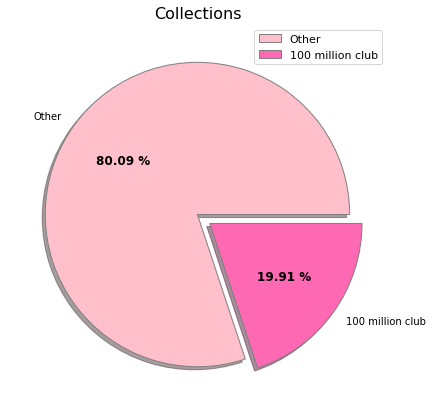

In [63]:
million = nftc.groupby(['100 mil club']).count()['Collections']

labels = ["Other","100 million club"]

explode = (0, 0.1)
 
colors = ("pink", "hotpink")

wp = { 'linewidth' : 1, 'edgecolor' : "grey" }
 
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(million,
                                  autopct = '%.2f %%',
                                  explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 

plt.legend(fontsize=11)
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Collections", fontdict={'fontsize': 16})
 
plt.show()

In [64]:
nftc_100 = nftc.loc[nftc['100 mil club'] == 'Yes']
average_sales_100 =round(nftc_100['Sales'].mean())
nftc_no100 = nftc.loc[nftc['100 mil club'] == 'No']
average_sales_no100 = round(nftc_no100['Sales'].mean())
print(f'Average sales of 100 million club is ${average_sales_100:,}')

Average sales of 100 million club is $514,041,026


Less than 20% of NFT collections are able to reach sales over $100 million indicating that the NFT collection choice is very important when it comes to making a good investment.

## Top 10 NFTs

This dataset has the top 10 NFTs and it was extracted using the OpenSea API.

In [65]:
nft_10 = pd.read_csv("top10_collection.csv")
nft_10

,Unnamed: 0,name,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,...,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price
0,0,CryptoPunks,1038.850,-0.579,15.000,69.257,15397.080,-0.250,166.000,92.753,...,79.121,822170.163,19037.000,9999.000,9999.000,3373,43.188,8,927442.186,NaN
1,1,Bored Ape Yacht Club,2015.722,0.261,17.000,118.572,29727.212,0.501,247.000,120.353,...,100.675,382480.463,24518.000,10000.000,10000.000,6282,15.600,51,1203530.846,99.690
2,2,Decentraland,778.409,1.570,37.000,21.038,2811.571,0.084,247.000,11.383,...,8.112,269395.366,17648.000,97264.000,97264.000,6624,15.265,2,1107144.387,4.549
3,3,Mutant Ape Yacht Club,1145.740,-0.384,47.000,24.377,19277.636,0.312,736.000,26.192,...,20.460,233146.988,25333.000,17934.000,17934.000,11671,9.203,16,469735.229,22.000
4,4,Art Blocks Curated,491.342,0.727,150.000,3.276,4112.559,1.331,1519.000,2.707,...,2.764,226661.230,51004.000,50324.000,50324.000,10534,4.444,0,136247.818,NaN
5,5,The Sandbox,581.457,-0.239,124.000,4.689,4639.330,-0.090,1045.000,4.440,...,4.141,151141.220,78870.000,127792.000,127792.000,19142,1.916,8,567339.056,3.740
6,6,CLONE X - X TAKASHI MURAKAMI,2469.361,-0.277,124.000,19.914,31811.079,1.355,1620.000,19.636,...,13.718,111097.779,11503.000,18803.000,18803.000,8167,9.658,15,369224.516,14.450
7,7,Rarible,3.699,-0.484,1018.000,0.004,181.882,0.685,5264.000,0.035,...,0.051,99406.202,2067162578.000,310573.000,310573.000,205087,0.000,14,10730.961,NaN
8,8,Azuki,2698.166,0.397,231.000,11.680,30605.221,-0.047,2174.000,14.078,...,5.623,94084.570,16731.000,10000.000,10000.000,5449,5.623,20,140778.387,9.480
9,9,Decentraland Wearables,0.689,-0.747,6.000,0.115,4.888,0.170,36.000,0.136,...,0.133,85701.291,23021.000,71061.000,71061.000,10285,3.723,1,9647.706,0.002


In [66]:
# Removing columns

nft_10.drop(nft_10[['one_day_volume','one_day_change','one_day_average_price','seven_day_volume','seven_day_change','seven_day_average_price','thirty_day_average_price','total_volume','total_supply','count','num_reports','thirty_day_volume','thirty_day_change','seven_day_sales','market_cap','floor_price']], axis = 1, inplace = True)

In [67]:
# rename columns

nft_10.rename(columns = {'total_sales':'Transactions'}, inplace = True)
nft_10.rename(columns = {'num_owners':'Owners'}, inplace = True)

In [68]:
# Converting to integar

nft_10['one_day_sales'] = nft_10['one_day_sales'].astype('int64')
nft_10['thirty_day_sales'] = nft_10['thirty_day_sales'].astype('int64')
nft_10['Transactions'] = nft_10['Transactions'].astype('int64')
nft_10['Owners'] = nft_10['Owners'].astype('int32')
nft_10['average_price'] = nft_10['average_price'].astype('int64')
nft_10.head()

,Unnamed: 0,name,one_day_sales,thirty_day_sales,Transactions,Owners,average_price
0,0,CryptoPunks,15,598,19037,3373,43
1,1,Bored Ape Yacht Club,17,818,24518,6282,15
2,2,Decentraland,37,1295,17648,6624,15
3,3,Mutant Ape Yacht Club,47,2787,25333,11671,9
4,4,Art Blocks Curated,150,3856,51004,10534,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CryptoPunks'),
  Text(1, 0, 'Bored Ape Yacht Club'),
  Text(2, 0, 'Decentraland'),
  Text(3, 0, 'Mutant Ape Yacht Club'),
  Text(4, 0, 'Art Blocks Curated'),
  Text(5, 0, 'The Sandbox'),
  Text(6, 0, 'CLONE X - X TAKASHI MURAKAMI'),
  Text(7, 0, 'Rarible'),
  Text(8, 0, 'Azuki'),
  Text(9, 0, 'Decentraland Wearables')])

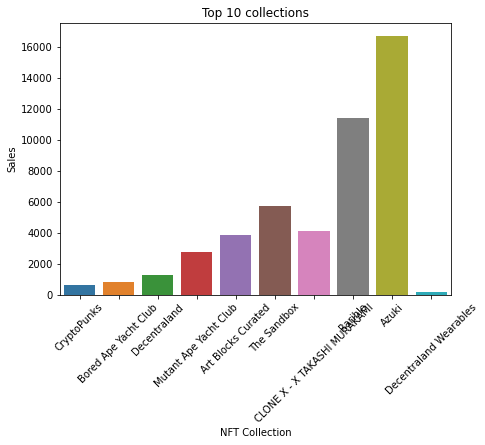

In [69]:
# visualise top 10

plt.figure(figsize=(7,5))
sns.barplot(x="name",y="thirty_day_sales",data= nft_10)
plt.title("Top 10 collections")
plt.xlabel('NFT Collection')
plt.ylabel('Sales')
plt.xticks(rotation=45)

The only collection that comes up more than once in the top 10 collection is 'Bored Ape' which again shows it is one of the best collections to invest in order to make a good return on investment.

# Question 4: What are the sales histories for different collections? 

In [70]:
cp_sales = pd.read_csv('CryptoPunks_.csv')
cp_sales

,DateTime,Sales (USD)
0,2017-06-23 00:00:00,1455.930
1,2017-06-24 00:00:00,883.030
2,2017-06-25 00:00:00,556.390
3,2017-06-26 00:00:00,1107.410
4,2017-06-27 00:00:00,2215.280
...,...,...
1370,2022-10-23 00:00:00,826675.830
1371,2022-10-24 00:00:00,713878.820
1372,2022-10-25 00:00:00,636740.250
1373,2022-10-26 00:00:00,1432022.640


In [71]:
cp_sales.describe()

,Sales (USD)
count,1375.000
mean,1473422.719
std,6195097.966
min,0.000
25%,226.425
50%,1804.060
75%,771232.285
max,143551541.000


In [72]:
cp_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     1375 non-null   object 
 1   Sales (USD)  1375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.6+ KB


In [73]:
cp_sales['DateTime'] = cp_sales['DateTime'].str.replace('00:00:00','')

In [74]:
cp_sales['DateTime'] = pd.to_datetime(cp_sales['DateTime'])
cp_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     1375 non-null   datetime64[ns]
 1   Sales (USD)  1375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.6 KB


In [75]:
bayc_sales = pd.read_csv('BAYC_sales.csv')
bayc_sales

,DateTime,Sales (USD)
0,2021-04-23 00:00:00,2074.270
1,2021-04-24 00:00:00,2862.840
2,2021-04-25 00:00:00,1472.330
3,2021-04-26 00:00:00,1616.640
4,2021-04-27 00:00:00,2540.510
...,...,...
548,2022-10-23 00:00:00,886101.510
549,2022-10-24 00:00:00,403949.220
550,2022-10-25 00:00:00,1596218.490
551,2022-10-26 00:00:00,1794182.780


In [76]:
bayc_sales.describe()

,Sales (USD)
count,553.000
mean,4456005.783
std,5879607.803
min,1472.330
25%,1215356.140
50%,2643236.580
75%,5434889.310
max,53716942.300


In [77]:
bayc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     553 non-null    object 
 1   Sales (USD)  553 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.8+ KB


In [78]:
bayc_sales['DateTime'] = bayc_sales['DateTime'].str.replace('00:00:00','')

In [79]:
bayc_sales['DateTime'] = pd.to_datetime(bayc_sales['DateTime'])
bayc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     553 non-null    datetime64[ns]
 1   Sales (USD)  553 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.8 KB


### Cleaning each dataframe

In [80]:
cp_sales.rename(columns = {'Sales (USD)':'CP Sales(USD)'}, inplace = True)
cp_sales.rename(columns = {'DateTime':'CP DateTime'}, inplace = True)
cp_sales=cp_sales.dropna()
cp_sales

,CP DateTime,CP Sales(USD)
0,2017-06-23,1455.930
1,2017-06-24,883.030
2,2017-06-25,556.390
3,2017-06-26,1107.410
4,2017-06-27,2215.280
...,...,...
1370,2022-10-23,826675.830
1371,2022-10-24,713878.820
1372,2022-10-25,636740.250
1373,2022-10-26,1432022.640


In [81]:
cp_sales['CP Sales(USD)'] = cp_sales['CP Sales(USD)'].astype('int64')
cp_sales

,CP DateTime,CP Sales(USD)
0,2017-06-23,1455
1,2017-06-24,883
2,2017-06-25,556
3,2017-06-26,1107
4,2017-06-27,2215
...,...,...
1370,2022-10-23,826675
1371,2022-10-24,713878
1372,2022-10-25,636740
1373,2022-10-26,1432022


In [82]:
bayc_sales.rename(columns = {'Sales (USD)':'BAYC Sales(USD)'}, inplace = True)
bayc_sales.rename(columns = {'DateTime':'BAYC DateTime'}, inplace = True)
bayc_sales=bayc_sales.dropna()
bayc_sales

,BAYC DateTime,BAYC Sales(USD)
0,2021-04-23,2074.270
1,2021-04-24,2862.840
2,2021-04-25,1472.330
3,2021-04-26,1616.640
4,2021-04-27,2540.510
...,...,...
548,2022-10-23,886101.510
549,2022-10-24,403949.220
550,2022-10-25,1596218.490
551,2022-10-26,1794182.780


In [83]:
bayc_sales['BAYC Sales(USD)'] = bayc_sales['BAYC Sales(USD)'].astype('int64')
bayc_sales

,BAYC DateTime,BAYC Sales(USD)
0,2021-04-23,2074
1,2021-04-24,2862
2,2021-04-25,1472
3,2021-04-26,1616
4,2021-04-27,2540
...,...,...
548,2022-10-23,886101
549,2022-10-24,403949
550,2022-10-25,1596218
551,2022-10-26,1794182


### Combining the dataframes

In [84]:
merged_df = pd.concat([cp_sales, bayc_sales], axis=1)
merged_df

,CP DateTime,CP Sales(USD),BAYC DateTime,BAYC Sales(USD)
0,2017-06-23,1455,2021-04-23,2074.000
1,2017-06-24,883,2021-04-24,2862.000
2,2017-06-25,556,2021-04-25,1472.000
3,2017-06-26,1107,2021-04-26,1616.000
4,2017-06-27,2215,2021-04-27,2540.000
...,...,...,...,...
1370,2022-10-23,826675,NaT,NaN
1371,2022-10-24,713878,NaT,NaN
1372,2022-10-25,636740,NaT,NaN
1373,2022-10-26,1432022,NaT,NaN


By merging the datasets together, we are able to have a closer comparative analysis of the sales of CryptoPunk NFTs and Bored Ape Yacht Club from the period of 2017 to 2022. The output below shows us how significantly bigger Bored Ape sales grew in comparison to CryptoPunk's. This analysis demonstrates the high growth of sales NFTs are able to generate and Bored Ape's sales growth in particular is significant because it was able to achieve its top status shortly after launching in April 2021.

In [85]:
merged_df.describe()

,CP Sales(USD),BAYC Sales(USD)
count,1375.000,553.000
mean,1473422.223,4456005.300
std,6195097.972,5879607.799
min,0.000,1472.000
25%,226.000,1215356.000
50%,1804.000,2643236.000
75%,771232.000,5434889.000
max,143551541.000,53716942.000


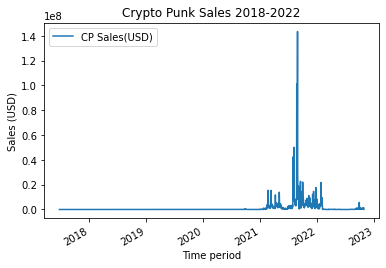

In [86]:
merged_df.plot(x='CP DateTime', y='CP Sales(USD)', kind='line')

plt.title("Crypto Punk Sales 2018-2022")
plt.xlabel("Time period")
plt.ylabel("Sales (USD)")

plt.show()

The contrast in sales growth between the two NFT collections is best illustrated by the above line chart where we can see that Crypto Punks has experienced long periods of no sales growth from the year 2018 to 2021. Sales growth begins to spike by the end of 2021 which was due to increased demand in cryptocurrencies and growth of various digital currencies hitting the mainstream. 

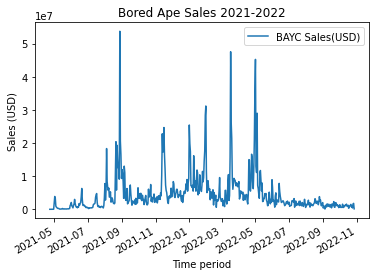

In [87]:
merged_df.plot(x='BAYC DateTime', y='BAYC Sales(USD)')

plt.title("Bored Ape Sales 2021-2022")
plt.xlabel("Time period")
plt.ylabel("Sales (USD)")

plt.show()

Bored Ape had fluctuating growth in sales through mid 2021 to mid 2022, similarly illustrating the growing interest in cryptocurrencies during this period. Unlike Crypto Punks, Bored Apes had more frequent periods of spikes in sales growth during this period which only began to steadily decline in mid 2022. Based on these findings, we can infer that there is a higher probability for Bored Ape NFTs to experience spikes in sales in the upcoming year of 2023 than Crypto Punk NFTs.

# Question 5: What NFT collections do the largest investors hold? 

In [88]:
#account number lists of accounts that have been active in the last 3 months, aka whale account
recently_active_whales= ['0x7a9fe22691c811ea339d9b73150e6911a5343dca','0x020ca66c30bec2c4fe3861a94e4db4a498a35872', '0x5fbd18572e422e9fc7de48271ceb9c726b2fb4d2','0x0F0eAE91990140C560D4156DB4f00c854Dc8F09E','0x020ca66c30bec2c4fe3861a94e4db4a498a35872','0x186bad94057591918c3265c4ddb12874324be8ac','0xd4100a2e1aacdeb18bcda92a280124a7111a12b6','0x33e3c007d1d48e2b645c9ce22570267b0c82f578','0x87bc2f2ba8c83f412fed5c3151de0ffbdc959984','0x1ad60130a2528c6f73a8c6e50758532949627dfd']


'''Return portfolio collection information given an Ethereum address.
Only NFTs of collection listed by NFTGo.io are returned (Most of high quality collections are listed).'''

#empty list to hold the nfts the whales are holding
all_nfts=[]

def find_holdings(whale):
    
    '''calls the API, filters the response and aggregates it into a list to show the 
    collections of all nfts that account is holding 
    '''
    
    url = f"https://data-api.nftgo.io/eth/v1/address/{whale}/collection"
    api_key = '4371cfd1-7538-4e2c-a1f1-bbc8caa09187'
    headers = {
        "accept": "application/json",
        "X-API-KEY": api_key
        }
    response = requests.get(url, headers=headers)
    print(response)
    whale_account = response.json()
    
    n=0
    for i in whale_account['collection_holdings']:
        all_nfts.append(whale_account['collection_holdings'][n]['collection']['name'])
        n+=1
    return all_nfts

#calls each whale in a list with a for loop 
for each in recently_active_whales:
    find_holdings(each)

    
#returns a list of all NFTs from all accounts
#all_nfts

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


Text(0, 0.5, 'number of whales holding NFT')

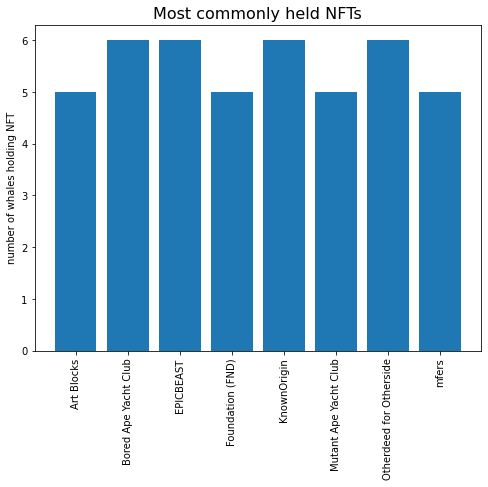

In [89]:
#counts the duplicated NFTS 
df = pd.DataFrame(all_nfts, columns= ['NFT'])

dups_NFT = df.pivot_table(columns=['NFT'],aggfunc='size')

df=pd.DataFrame(dups_NFT)
df.rename(columns={0:'Count'}, inplace=True)


#selects the NFTS that are shared by the whales at least 4 times
most_common=df[df['Count']>4]


# only return collections, delete the storefronts that don't let you see what was bought
most_common=most_common.drop('OpenSea Shared Storefront')
most_common=most_common.drop ('ENS: Ethereum Name Service')
most_common=most_common.drop ('Rarible')


#displays most common NFTS
plt.figure(figsize=(8,6))
plt.bar(most_common.index,most_common['Count'])

plt.show
plt.xticks(rotation=90)
plt.title('Most commonly held NFTs', fontsize=16)
plt.ylabel('number of whales holding NFT')


The bar plot shows the NFT collections that at least 5 whales shared. These collections represent the most popular NFT collections for the population of whales sampled. Outliers were removed if the information provided was not sufficient to determine the collection name. Bored Ape Yacht Club, EPIC BEAST, KnownOrigin and Otherdeed for the Otherside are the most commmon NFT collections. 

## Further exploratory analysis

## How much money have whale accounts made over time

In [90]:
top_whales=['0x020ca66c30bec2c4fe3861a94e4db4a498a35872','0x55faf0e5e6e532b1c5799bdeec1a0f193e54a92d','0x0F0eAE91990140C560D4156DB4f00c854Dc8F09E','0x54BE3a794282C030b15E43aE2bB182E14c409C5e','0x7eb413211a9de1cd2fe8b8bb6055636c43f7d206','0x0f0eae91990140c560d4156db4f00c854dc8f09e','0x8eea79f9c6da7e8a8a41efdbbfd947f4326a901e','0xe648730be51893acd0045522a0830ec5399ae74c','0xe301612b0751f6d862a27be205fb8e3c40c8c6db','0x020ca66c30bec2c4fe3861a94e4db4a498a35872','0x1f4a3a9eb3f26b48ef4cdd46f57016324e3ba0ea','0x56178626332fc530561535eeaa914b863aa455f2','0x56178626332fc530561535eeaa914b863aa455f2','0xf4b4a58974524e183c275f3c6ea895bc2368e738']


In [91]:

API_KEY= 'QH89DKEKUIBQR98KPE7FB41AJQ6PJBQXSJ'
address = "0xa99a76dddbb9678bc33f39919bc76d279c680c89" #whale
BASE_URL ='https://api.etherscan.io/api'
ETHER_VALUE= 10**18

def make_api_url(module,action,address, **kwargs):
    url= BASE_URL+f'?module={module}&action={action}&address={address}&apikey={API_KEY}'
    for key,value in kwargs.items():
        url+= f"&{key}={value}"
    return url

balance_url= make_api_url("account", "balance", address, tag="latest")

response = requests.get(balance_url)
data = response.json()
data
data['result']

def account_balance(address):
    balance_url= make_api_url("account", "balance", address, tag="latest")
    response = requests.get(balance_url)
    data = response.json()
    value= int(data['result'])/ETHER_VALUE
    return value

balances =[]
times=[]
def transactions(address):
    transactions_url = make_api_url("account","txlist", address, startblock = 0, endblock= 99999999, page = 1, offset = 10000, sort="asc")
    response = requests.get(transactions_url)
    data = response.json()['result']
    
    internal_tx_url=make_api_url("account","txlistinternal", address, startblock = 0, endblock= 99999999, page = 1, offset = 10000, sort="asc")
    response2= requests.get(internal_tx_url)
    data2 = response2.json()["result"]
    data.extend(data2)
    data.sort(key=lambda x:int(x['timeStamp']))

    current_balance = 0
    #balances =[]
    #times=[]
    for tx in data: 
        to = tx['to']
        from_addr = tx["from"]
        value= int(tx["value"])/ETHER_VALUE
        if"gasPrice" in tx:
            gas = int(tx["gasUsed"])*int(tx["gasPrice"])/ETHER_VALUE
        else:
            gas = int(tx["gasUsed"])/ETHER_VALUE

        time= datetime.fromtimestamp(int(tx["timeStamp"]))
        money_in= to.lower()== address.lower()

        if money_in:
            current_balance+= value
        else:
            current_balance-= value+gas
            
        balances.append(current_balance)
        times.append(time)
        #plt.plot(times, balances)
        #plt.show
    return times, balances 
    



In [92]:
times=[]
balances=[]
transactions(top_whales[10])

df_1=pd.DataFrame()
df_1['date']=times
df_1['balance']=balances
df_1['USD']=df_1['balance']*1363.590942
max_1=df_1.max()

In [93]:
times=[]
balances=[]
transactions(top_whales[1])
df_2=pd.DataFrame()
df_2['date']=times
df_2['balance']=balances
df_2['USD']=df_2['balance']*1363.590942

In [94]:
times=[]
balances=[]
transactions(top_whales[12])
df_3=pd.DataFrame()
df_3['date']=times
df_3['balance']=balances
df_3['USD']=df_3['balance']*1363.590942

In [95]:
times=[]
balances=[]
transactions(top_whales[13])
df_4=pd.DataFrame()
df_4['date']=times
df_4['balance']=balances
df_4['USD']=df_4['balance']*1363.590942

In [96]:
times=[]
balances=[]
transactions(top_whales[6])
df_5=pd.DataFrame()
df_5['date']=times
df_5['balance']=balances
df_5['USD']=df_5['balance']*1363.590942


In [97]:
times=[]
balances=[]
transactions(top_whales[8])
df_6=pd.DataFrame()
df_6['date']=times
df_6['balance']=balances
df_6['USD']=df_6['balance']*1363.590942

In [98]:
times=[]
balances=[]
transactions(top_whales[11])
df_7=pd.DataFrame()
df_7['date']=times
df_7['balance']=balances
df_7['USD']=df_7['balance']*1363.590942


In [99]:
times=[]
balances=[]
transactions(top_whales[0])
df_8=pd.DataFrame()
df_8['date']=times
df_8['balance']=balances
df_8['USD']=df_8['balance']*1363.590942

In [100]:
times=[]
balances=[]
transactions(top_whales[3])
df_9=pd.DataFrame()
df_9['date']=times
df_9['balance']=balances
df_9['USD']=df_9['balance']*1363.590942

<function matplotlib.pyplot.show(close=None, block=None)>

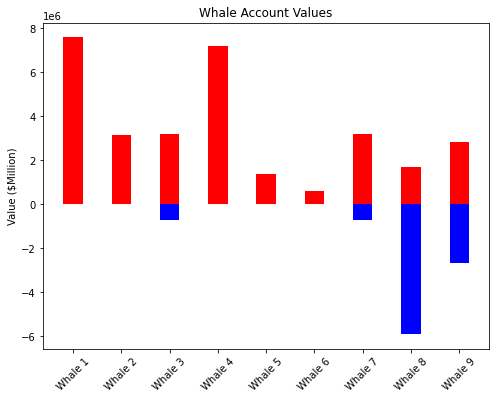

In [101]:
#create a dataframe of maximum values
max_1=df_1.max()
max_2=df_2.max()
max_3=df_3.max()
max_4=df_4.max()
max_5=df_5.max()
max_6=df_6.max()
max_7=df_7.max()
max_8=df_8.max()
max_9=df_9.max()
maxi=[max_1, max_2, max_3, max_4, max_5, max_6, max_7, max_8, max_9]
maximum=pd.DataFrame(maxi)

#maximum

#create a dtatframe of minimum values
min_1=df_1.min()
min_2=df_2.min()
min_3=df_3.min()
min_4=df_4.min()
min_5=df_5.min()
min_6=df_6.min()
min_7=df_7.min()
min_8=df_8.min()
min_9=df_9.min()
mini=[min_1, min_2, min_3, min_4, min_5, min_6, min_7, min_8, min_9]
minimum=pd.DataFrame(mini)


#visualise minimum and maximum values from whale accounts 
plt.figure(figsize=(8,6))
ex = np.arange(len(mini))
plt.bar( maximum.index,maximum['USD'],0.4, color='r')
plt.bar( minimum.index,minimum['USD'],0.4, color='b')


  
bars = ('Whale 1', 'Whale 2', 'Whale 3', 'Whale 4', 'Whale 5','Whale 6','Whale 7','Whale 8','Whale 9')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, rotation=45)
plt.title('Whale Account Values')
plt.ylabel('Value ($Million)')
plt.show


The plot above shows the all time highs and low balances in the whale accounts from the time they opened. It can be seen that although all whales made at least 1 million in US dollars, they also lost significant amounts too. The most successful whales are whale 1 and whale 4, both making over 7 million, while whale 8 is the most unsuccessful losing 6 million dollars.  

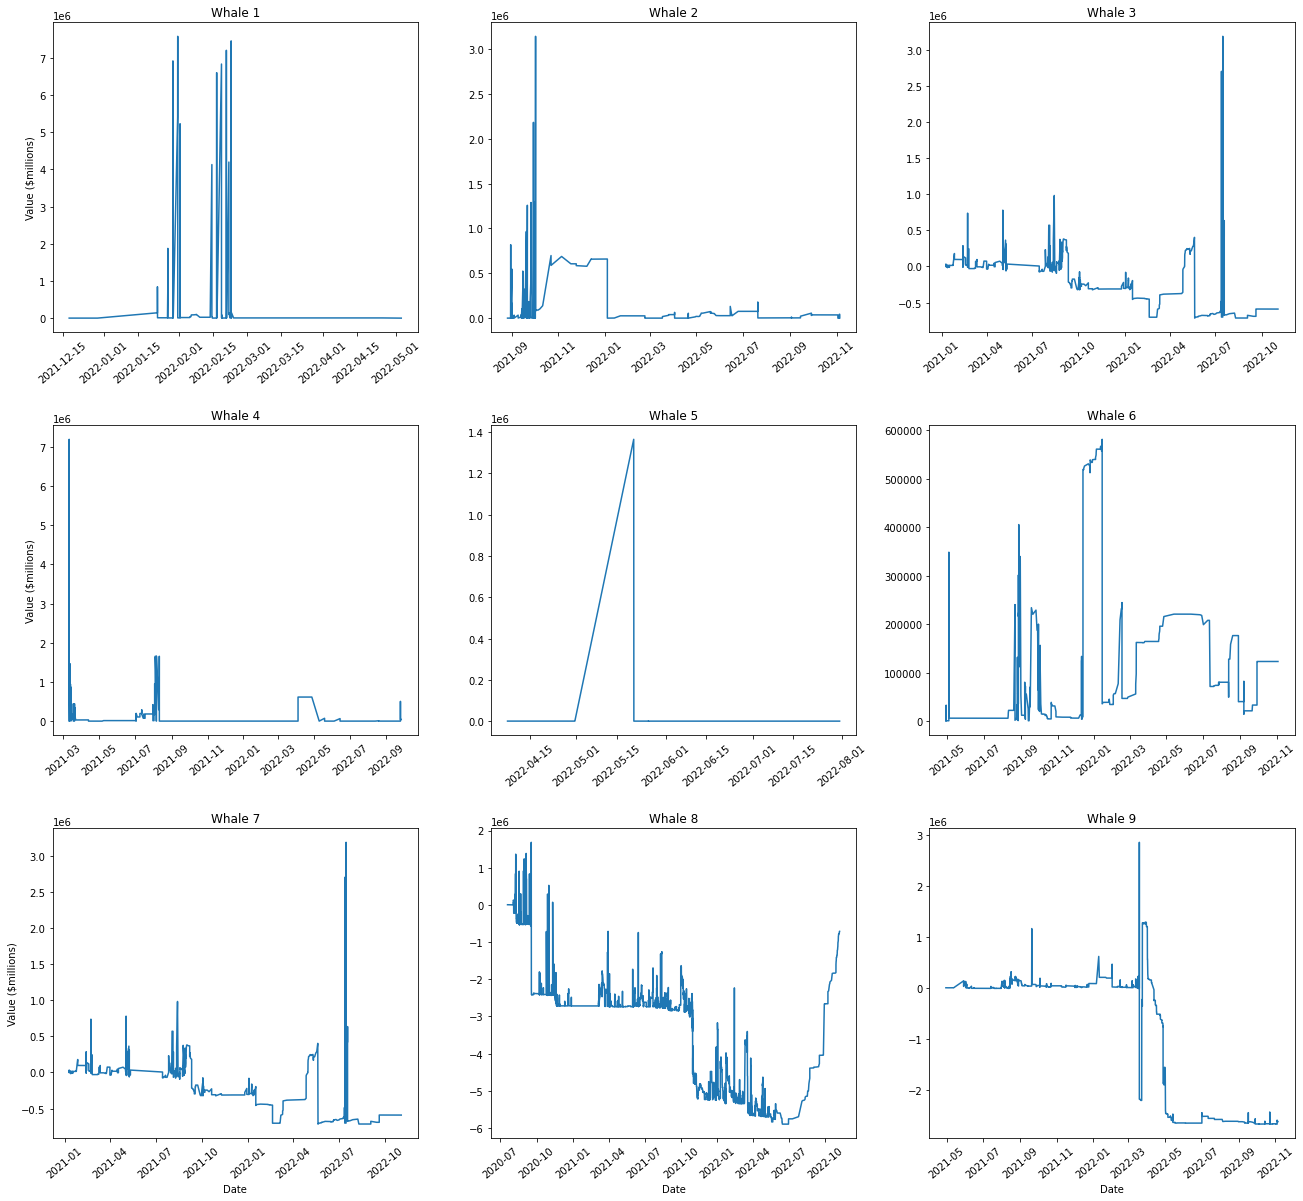

In [102]:
#plot whale account balances over time as subplots 
plt.title('Whale')

plt.subplots_adjust(left = None, right = 3.0, top = 4.0, hspace = 0.3)
plt.subplot(3, 3, 1)
plt.plot(df_1['date'], df_1['USD'])
plt.xticks(rotation=40)
plt.title('Whale 1')
plt.ylabel('Value ($millions)')

plt.subplot(3, 3, 2)
plt.plot(df_2['date'], df_2['USD'])
plt.xticks(rotation=40)
plt.title('Whale 2')

plt.subplot(3,3,3)
plt.plot(df_3['date'], df_3['USD'])
plt.xticks(rotation=40)
plt.title('Whale 3')

plt.subplot(3,3,4)
plt.plot(df_4['date'], df_4['USD'])
plt.xticks(rotation=40)
plt.title('Whale 4')
plt.ylabel('Value ($millions)')

plt.subplot(3,3,5)
plt.plot(df_5['date'], df_5['USD'])
plt.xticks(rotation=40)
plt.title('Whale 5')

plt.subplot(3,3,6)
plt.plot(df_6['date'], df_6['USD'])
plt.xticks(rotation=40)
plt.title('Whale 6')

plt.subplot(3,3,7)
plt.plot(df_7['date'], df_7['USD'])
plt.xticks(rotation=40)
plt.title('Whale 7')
plt.xlabel('Date')
plt.ylabel('Value ($millions)')

plt.subplot(3,3,8)
plt.plot(df_8['date'], df_8['USD'])
plt.xticks(rotation=40)
plt.title('Whale 8')
plt.xlabel('Date')

plt.subplot(3,3,9)
plt.plot(df_9['date'], df_9['USD'])
plt.title('Whale 9')
plt.xticks(rotation=40)
plt.xlabel('Date')

plt.show()

The line plots above show the diversity in the transactions of the whale accounts over time, further analysis of this data set to find patterns in the behaviour of the account holders did not seem feasible with the sample size and timeframe of the study.

The y axis, in millions of US dollars, shows that 1 and 4 are the most succesful whales, which cooberates the information from the bar plot above. it also shows whale 6, 7, and 8 are currently holding a negative value. Graph 5 could demonstrate the prescence of an outlier in the data as the all time high balance looks as though it was generated in a single transaction, which seems unusual. 